# Quandl: Price of Gold

In this notebook, we'll take a look at data set , available on [Quantopian](https://www.quantopian.com/data). This dataset spans from 1968 through the current day. It contains the value for the price of gold, as sourced by the Deutsche Bundesbank Data Repository. We access this data via the API provided by Quandl. See [Quandl's detail page](https://www.quandl.com/data/BUNDESBANK/BBK01_WT5511-Gold-Price-USD) for this set for more information.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [1]:
# import the dataset
from quantopian.interactive.data.quandl import bundesbank_bbk01_wt5511 as dataset
# Since this data is public domain and provided by Quandl for free, there is no _free version of this
# data set, as found in the premium sets. This import gets you the entirety of this data set.

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("var * {value: float64, asof_date: datetime, timestamp: datetime}")

In [3]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

12152

In [4]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,value,asof_date,timestamp
0,1218.75,2016-02-23,2016-02-24 05:01:08.129270
1,1232.25,2016-02-24,2016-02-25 05:03:59.157245
2,1235.40,2016-02-25,2016-02-26 05:01:02.768591


Let's go plot it for fun.

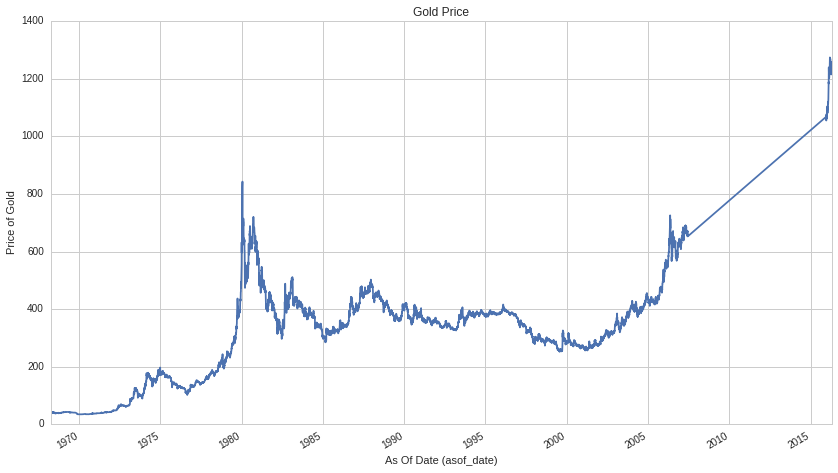

In [8]:
gold_df = odo(dataset, pd.DataFrame)

gold_df.plot(x='asof_date', y='value')
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Price of Gold")
plt.title("Gold Price")
plt.legend().set_visible(False)

The data points between 2007 and 2015 are missing because the number of results is limited to 10,000. Let's narrow the timeframe to get a complete picture of recent prices.

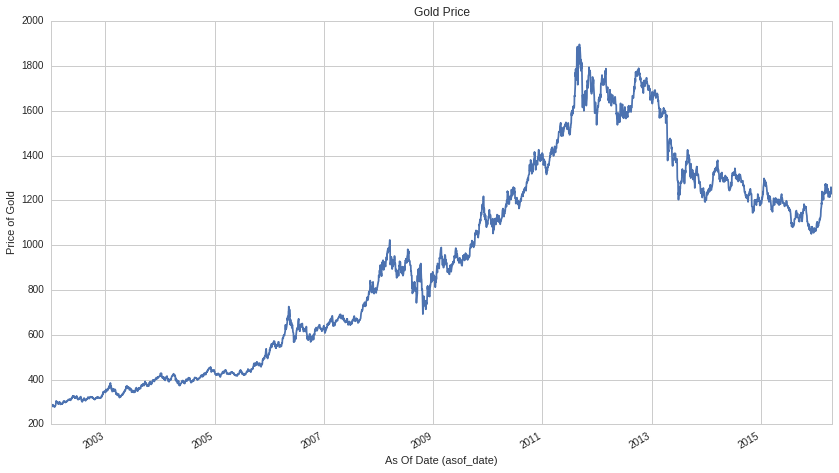

In [7]:
small_df = odo(dataset[dataset.asof_date >= '2002-01-01'], pd.DataFrame)

small_df.plot(x='asof_date', y='value')
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Price of Gold")
plt.title("Gold Price")
plt.legend().set_visible(False)

<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.quandl import bundesbank_bbk01_wt5511 as gold`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(gold.value.latest, 'value')`

In [1]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

In [2]:
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.quandl import bundesbank_bbk01_wt5511 as gold

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [3]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (gold,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: bundesbank_bbk01_wt5511

Fields:
value - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [4]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters
pipe = Pipeline()
       
pipe.add(gold.value.latest, 'value')

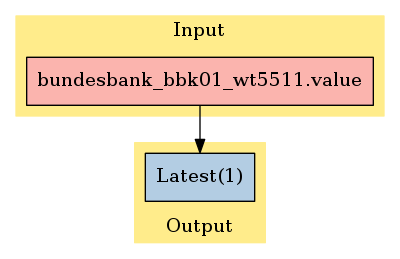

In [5]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [6]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

value
2013-11-01 00:00:00+00:00 Equity(2 [AA])          1351.0
                          Equity(21 [AAME])       1351.0
                          Equity(24 [AAPL])       1351.0
                          Equity(25 [AA_PR])      1351.0
                          Equity(31 [ABAX])       1351.0
                          Equity(39 [DDC])        1351.0
                          Equity(41 [ARCB])       1351.0
                          Equity(52 [ABM])        1351.0
                          Equity(53 [ABMD])       1351.0
                          Equity(62 [ABT])        1351.0
                          Equity(64 [ABX])        1351.0
                          Equity(66 [AB])         1351.0
                          Equity(67 [ADSK])       1351.0
                          Equity(69 [ACAT])       1351.0
                          Equity(70 [VBF])        1351.0
                          Equity(76 [TAP])        1351.0
                          Equity(84 [ACET])       1351.0
                          Equity(86 [ACG])        1351.0
                          Equity(88 [ACI])        1351.0
                          Equity(99 [ACO])        1351.0
                          Equity(100 [IEP])       1351.0
                          Equity(106 [ACU])       1351.0
                          Equity(110 [ACXM])      1351.0
                          Equity(112 [ACY])       1351.0
                          Equity(114 [ADBE])      1351.0
                          Equity(117 [AEY])       1351.0
                          Equity(122 [ADI])       1351.0
                          Equity(128 [ADM])       1351.0
                          Equity(134 [SXCL])      1351.0
                          Equity(149 [ADX])       1351.0
...                                                  ...
2013-11-25 00:00:00+00:00 Equity(45864 [CDX])     1248.5
                          Equity(45865 [XNCR])    1248.5
                          Equity(45866 [ZU])      1248.5
                          Equity(45867 [EROS])    1248.5
                          Equity(45873 [IR_WI])   1248.5
                          Equity(45874 [ALLE])    1248.5
                          Equity(45875 [HFIN])    1248.5
                          Equity(45880 [CACQ])    1248.5
                          Equity(45882 [TKF_WD])  1248.5
                          Equity(45883 [IIF_WD])  1248.5
                          Equity(45885 [EGF_WD])  1248.5
                          Equity(45891 [OXFD])    1248.5
                          Equity(45892 [TLOG])    1248.5
                          Equity(45893 [VTL])     1248.5
                          Equity(45894 [RTGN])    1248.5
                          Equity(45895 [EMSH])    1248.5
                          Equity(45896 [AMZG])    1248.5
                          Equity(45902 [WBAI])    1248.5
                          Equity(45903 [GOMO])    1248.5
                          Equity(45904 [IPWR])    1248.5
                          Equity(45905 [GFIS])    1248.5
                          Equity(45906 [VNCE])    1248.5
                          Equity(45907 [RITT_W])  1248.5
                          Equity(45914 [EVGN])    1248.5
                          Equity(45915 [NVGS])    1248.5
                          Equity(48504 [ERUS])    1248.5
                          Equity(49010 [TBRA])    1248.5
                          Equity(49131 [OESX])    1248.5
                          Equity(49259 [ITUS])    1248.5
                          Equity(49523 [TLGT])    1248.5

[134806 rows x 1 columns]

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [11]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline

# Import the datasets available
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.quandl import bundesbank_bbk01_wt5511 as gold

def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()

    # Add pipeline factors
    pipe.add(gold.value.latest, 'value')
    
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>